In [6]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Pokémon Team Clustering

Use the team space already developed to run k-means clustering and find the most common team archetypes.

In [7]:
# Get the data

path = "./team_centroids.json"

with open(path, 'r') as file:
    data = json.load(file)
    teams = list(data)


print(teams)

[[74.16666666666667, 85.83333333333333, 68.83333333333333, 108.33333333333333, 91.66666666666667, 101.66666666666667], [102.33333333333333, 105.33333333333333, 91.16666666666667, 82.5, 80.66666666666667, 94.66666666666667], [93, 92, 91.5, 72.5, 79.33333333333333, 85.83333333333333], [87, 98.16666666666667, 106, 89.83333333333333, 100.16666666666667, 70.5], [84.5, 114.16666666666667, 94.83333333333333, 78, 82.66666666666667, 102.5], [89.83333333333333, 104.16666666666667, 98, 74.66666666666667, 83, 84.66666666666667], [87.5, 91.66666666666667, 84.66666666666667, 87.16666666666667, 75.83333333333333, 82], [98.33333333333333, 110, 84.83333333333333, 90.5, 84.33333333333333, 87], [94.33333333333333, 126.66666666666667, 97.66666666666667, 79.66666666666667, 84.66666666666667, 105.33333333333333], [101.66666666666667, 102.16666666666667, 99.66666666666667, 79.5, 98.16666666666667, 62.666666666666664], [103, 100.83333333333333, 98.33333333333333, 110, 83.33333333333333, 72], [114, 113.3333333

## PCA Visualization

The data are currently six-dimensional, for better visualization we can collapse them into three dimensions, projecting them on the cube like so:

In [1]:
from sklearn.decomposition import PCA

transformed = teams

pca = PCA()
transformed = pca.fit_transform(transformed)


# Define six viewpoints: (elev, azim)
views = [
    (30, 45),     # isometric front-right-top
    (30, 135),    # isometric front-left-top
    (30, 225),    # isometric back-left-top
    (30, 315),    # isometric back-right-top
    (90, 0),      # top-down
    (-90, 0),     # bottom-up
]

titles = [
    "Isometric 1",
    "Isometric 2",
    "Isometric 3",
    "Isometric 4",
    "Top-down",
    "Bottom-up",
]

fig = plt.figure(figsize=(18, 12))

for i, (elev, azim) in enumerate(views):
    ax = fig.add_subplot(2, 3, i + 1, projection='3d')
    ax.scatter(transformed[:, 0], transformed[:, 1], transformed[:, 2], c='blue', alpha=0.6)
    ax.view_init(elev=elev, azim=azim)
    ax.set_title(titles[i])
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')

plt.tight_layout()
plt.show()

NameError: name 'teams' is not defined

# K-Means Clustering

We run K-means clustering on the uncollapsed data to figure out how to categorize them.

In [9]:
from sklearn.cluster import KMeans

In [10]:
k = 7

kmeans = KMeans(n_clusters=k).fit(teams)

groupings = kmeans.predict(teams)

cluster_centers = kmeans.cluster_centers_

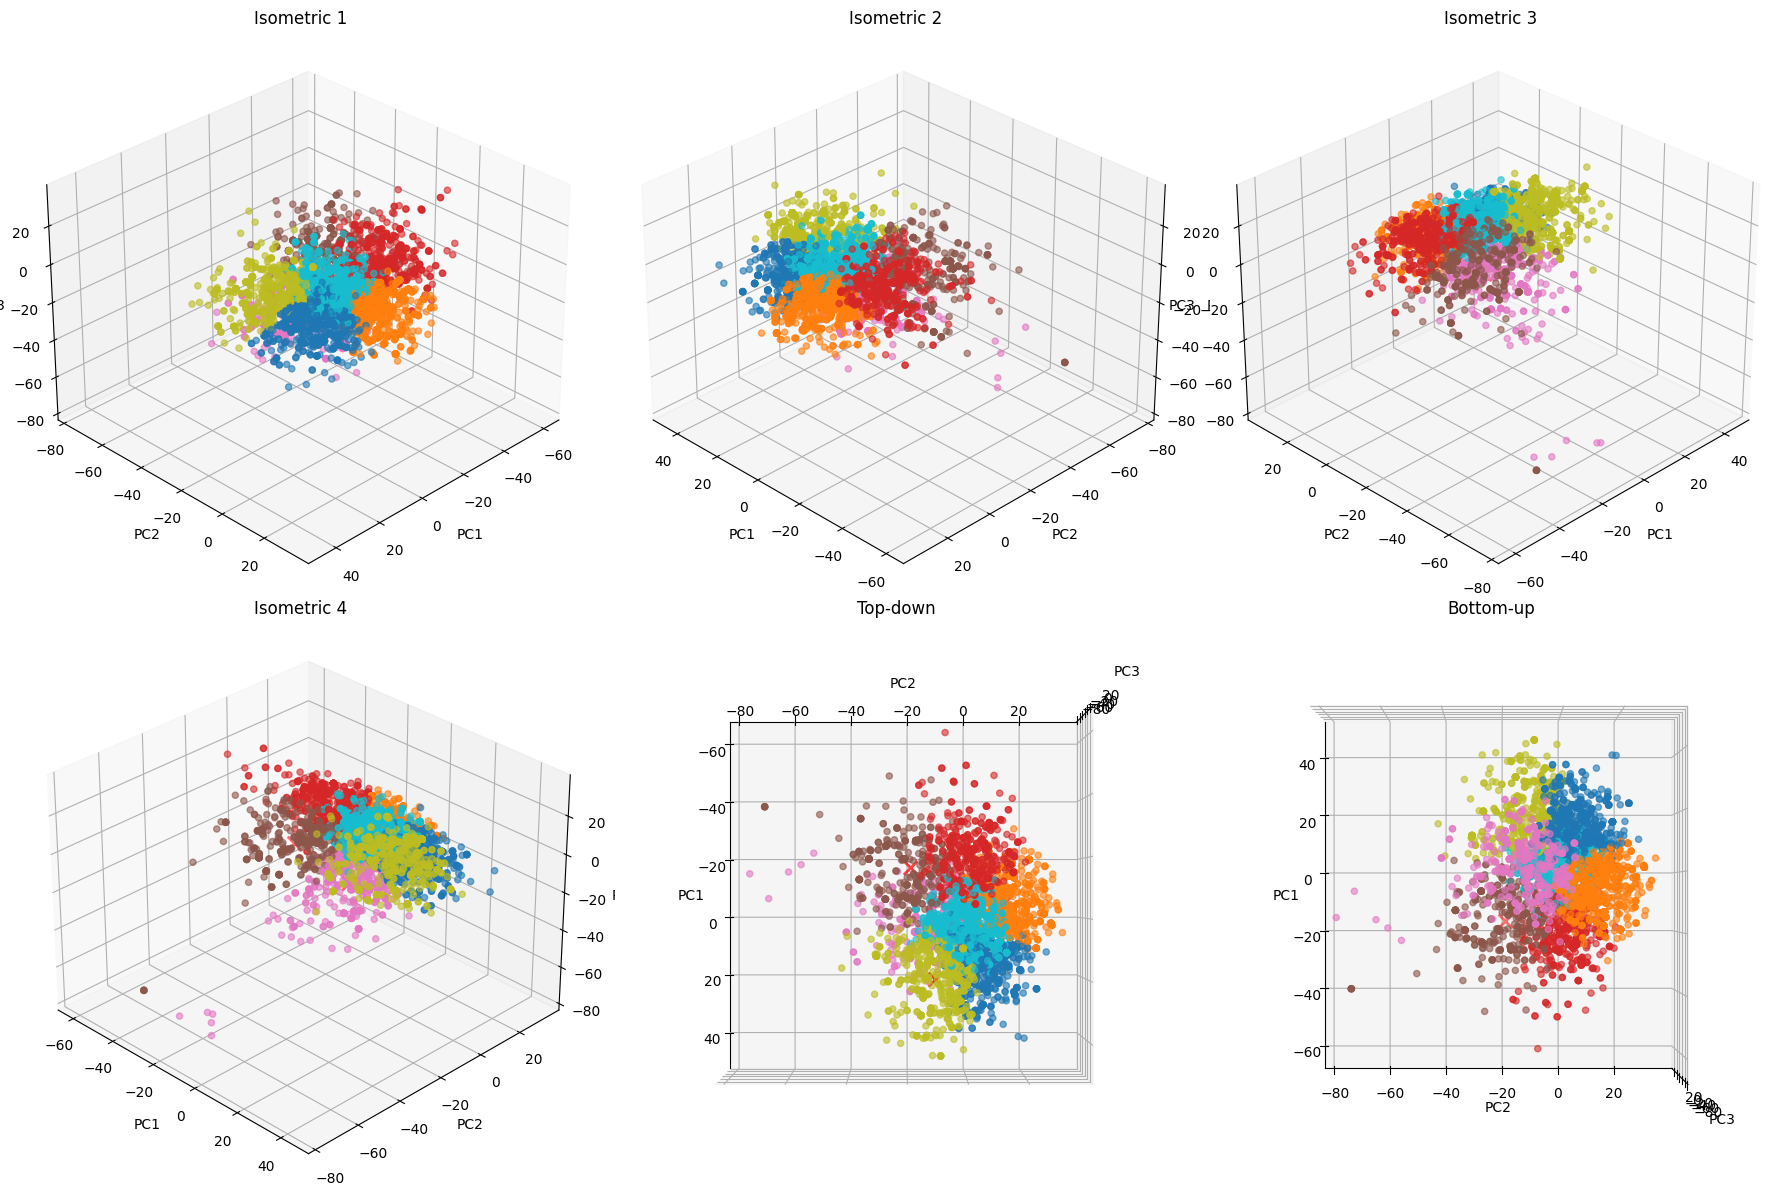

In [11]:

# KMeans
k = 7
kmeans = KMeans(n_clusters=k, n_init='auto').fit(teams)
groupings = kmeans.labels_
cluster_centers = kmeans.cluster_centers_
transformed_centers = pca.transform(cluster_centers)

# Define six viewpoints: (elev, azim)
views = [
    (30, 45), (30, 135), (30, 225), (30, 315),
    (90, 0), (-90, 0)
]
titles = [
    "Isometric 1", "Isometric 2", "Isometric 3", "Isometric 4",
    "Top-down", "Bottom-up"
]

fig = plt.figure(figsize=(18, 12))
for i, (elev, azim) in enumerate(views):
    ax = fig.add_subplot(2, 3, i + 1, projection='3d')
    
    # Scatter data points by cluster color
    scatter = ax.scatter(
        transformed[:, 0], transformed[:, 1], transformed[:, 2],
        c=groupings, cmap='tab10', alpha=0.6, s=20
    )
    
    # Plot cluster centers as red Xs
    ax.scatter(
        transformed_centers[:, 0], transformed_centers[:, 1], transformed_centers[:, 2],
        c='red', marker='x', s=100, linewidths=2
    )
    
    ax.view_init(elev=elev, azim=azim)
    ax.set_title(titles[i])
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')

plt.tight_layout()
plt.show()

## Comparing Values of k

We need to figure out what the best value of k is for the data. To do this, we'll compute kmeans with many different values of k and determine the total error for each k value, and choose the k value at the "elbow" of the plot that minimizes both the error and the compute time.

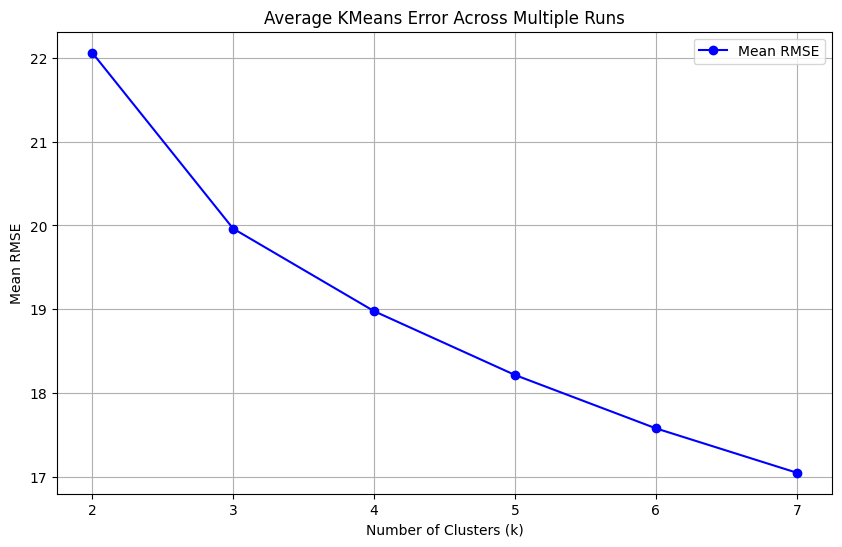

In [14]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

errors = []
repeats = 10  # Number of times to run KMeans for each k

for k in range(2, 8):
    rmses = []
    for _ in range(repeats):
        kmeans = KMeans(n_clusters=k, n_init='auto').fit(teams)
        rmse = (kmeans.inertia_ / len(teams)) ** 0.5
        rmses.append(rmse)
    mean_rmse = np.mean(rmses)
    errors.append(mean_rmse)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 8), errors, marker='o', color='b', label="Mean RMSE")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Mean RMSE")
plt.title("Average KMeans Error Across Multiple Runs")
plt.legend()
plt.grid(True)
plt.show()


By visual inspection, it looks like k = 3 is the best choice. That number has the closest thing to an elbow we see in the graph.

# Running and Visualizing K Means with K=3



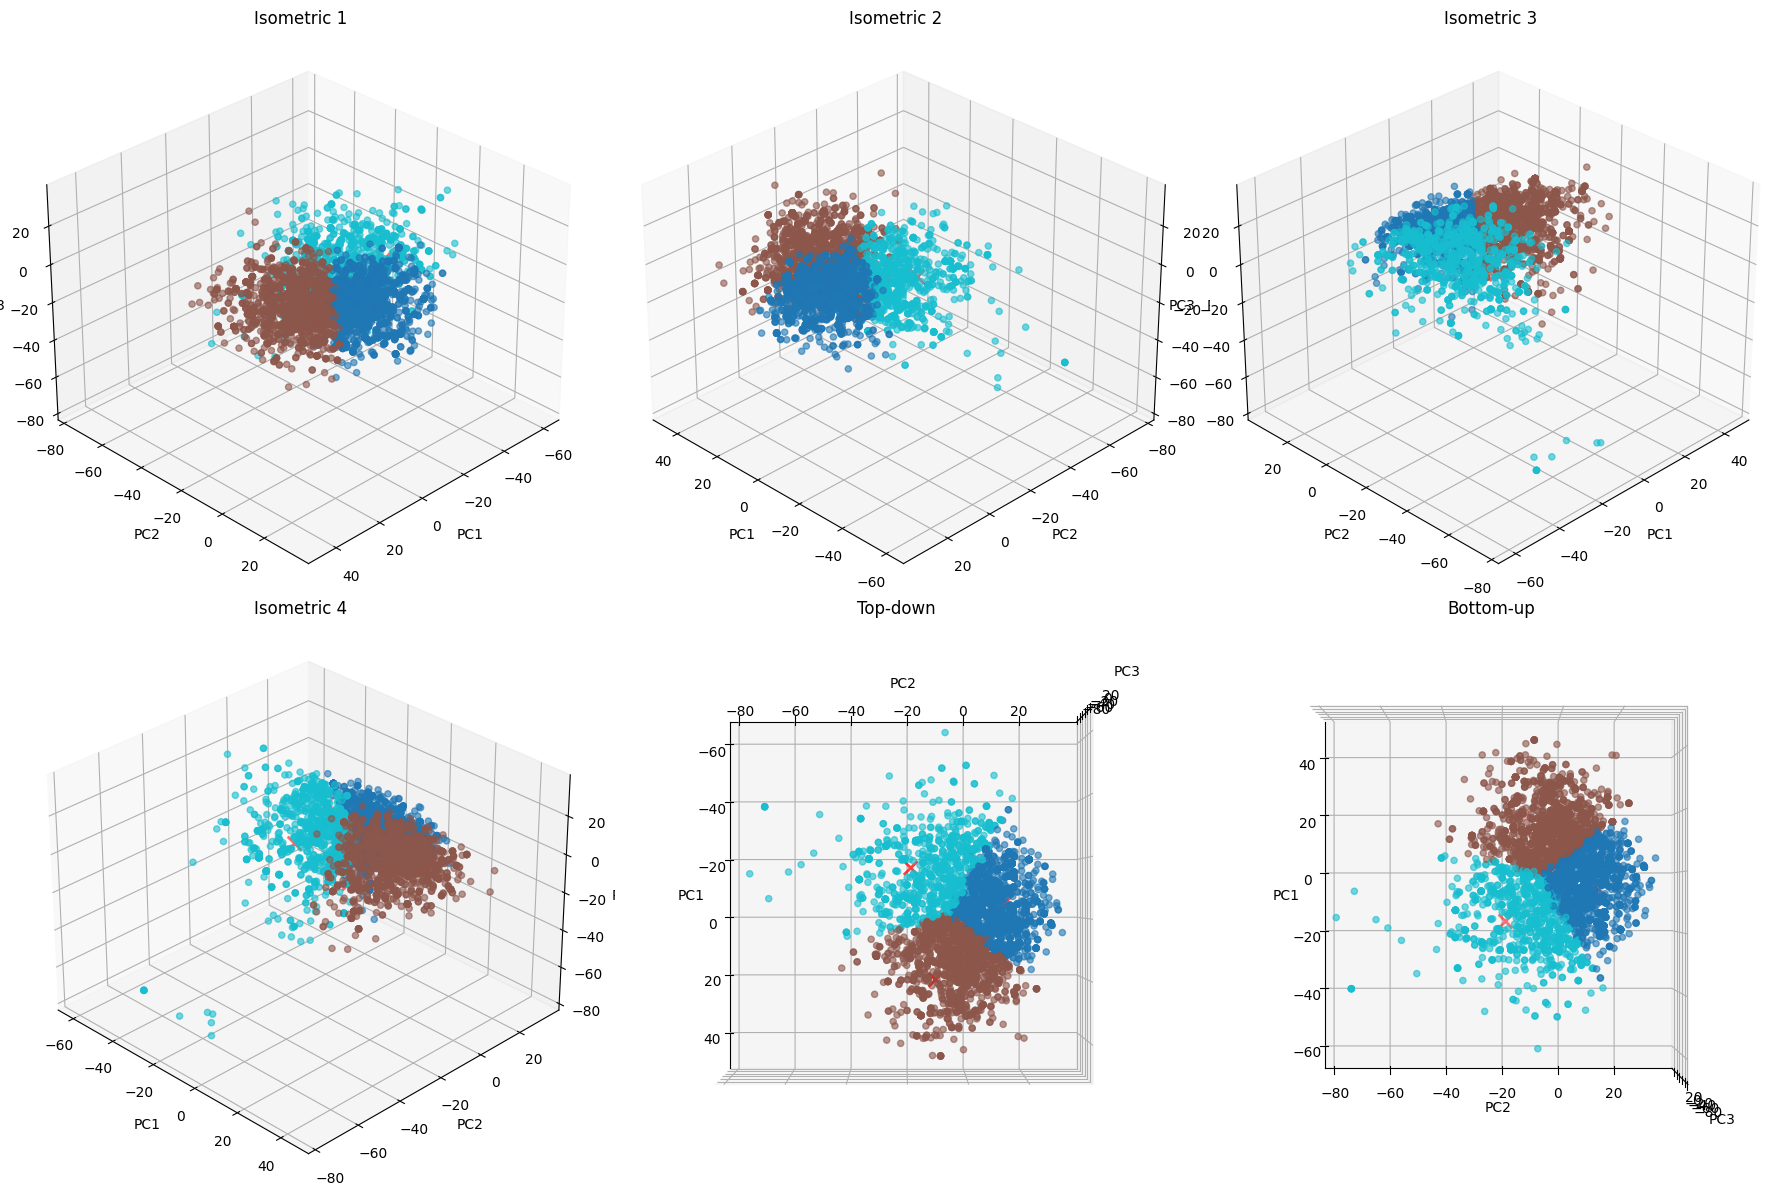

In [24]:
k = 3

kmeans = KMeans(n_clusters=k).fit(teams)

groupings = kmeans.predict(teams)

cluster_centers = kmeans.cluster_centers_

# Define six viewpoints: (elev, azim)
views = [
    (30, 45), (30, 135), (30, 225), (30, 315),
    (90, 0), (-90, 0)
]
titles = [
    "Isometric 1", "Isometric 2", "Isometric 3", "Isometric 4",
    "Top-down", "Bottom-up"
]

fig = plt.figure(figsize=(18, 12))
for i, (elev, azim) in enumerate(views):
    ax = fig.add_subplot(2, 3, i + 1, projection='3d')
    
    # Scatter data points by cluster color
    scatter = ax.scatter(
        transformed[:, 0], transformed[:, 1], transformed[:, 2],
        c=groupings, cmap='tab10', alpha=0.6, s=20
    )
    
    # Plot cluster centers as red Xs
    ax.scatter(
        transformed_centers[:, 0], transformed_centers[:, 1], transformed_centers[:, 2],
        c='red', marker='x', s=100, linewidths=2
    )
    
    ax.view_init(elev=elev, azim=azim)
    ax.set_title(titles[i])
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')

plt.tight_layout()
plt.show()

# What are the Archetypes?

What are the three archetypes we just found that correspond to each category? 

We can find this out by looking at how their average stats differ from each other and by looking at a few representative pokémon from each team.

## Average Stats

In [27]:
print(kmeans.cluster_centers_)

labels = ['HP', 'ATTACK', 'DEFENSE', 'SPECIAL ATTACK', 'SPECIAL DEFENSE', 'SPEED']

cluster_stats = pd.DataFrame(kmeans.cluster_centers_, columns=labels)

cluster_stats

[[ 97.31917695 110.18213992  90.95851852  89.5436214   85.64995885
   90.8072428 ]
 [ 86.61079812  94.4058216   85.05887324 100.56929577  93.17671362
   96.95483568]
 [ 91.07405745  96.3885398   93.03485937  84.78081987  87.56029324
   70.97366846]]


,HP,ATTACK,DEFENSE,SPECIAL ATTACK,SPECIAL DEFENSE,SPEED
0,97.319177,110.182140,90.958519,89.543621,85.649959,90.807243
1,86.610798,94.405822,85.058873,100.569296,93.176714,96.954836
2,91.074057,96.388540,93.034859,84.780820,87.560293,70.973668


In [ ]:
# Are all cluster groups equally powerful? Find out by taking the mean of each cluster's stats

mean = cluster_stats.mean(axis=1)

cluster_stats['MEAN'] = mean
cluster_stats

# Yes, it looks like the first cluster is most powerful, following by the second and third in the table

,HP,ATTACK,DEFENSE,SPECIAL ATTACK,SPECIAL DEFENSE,SPEED,mean,MEAN
0,97.319177,110.182140,90.958519,89.543621,85.649959,90.807243,94.076776,94.076776
1,86.610798,94.405822,85.058873,100.569296,93.176714,96.954836,92.796056,92.796056
2,91.074057,96.388540,93.034859,84.780820,87.560293,70.973668,87.302040,87.302040
